### EDA with Python and Logistic Regression
We'll try to predict a classification - survived or deceased using Logistic Regression in Python for classification.
(we have used semi-cleaned data set here)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### The Data

In [5]:
train = pd.read_csv('Datasets/titanic_train.csv', index_col='PassengerId')

In [6]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Exploratory data analysis

#### Missing Data:
We use a seaborn to create a simple heatmap to see where we are missing data!

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [9]:
train.isnull()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
887,False,False,False,False,False,False,False,False,False,True,False
888,False,False,False,False,False,False,False,False,False,False,False
889,False,False,False,False,True,False,False,False,False,True,False


<Axes: ylabel='PassengerId'>

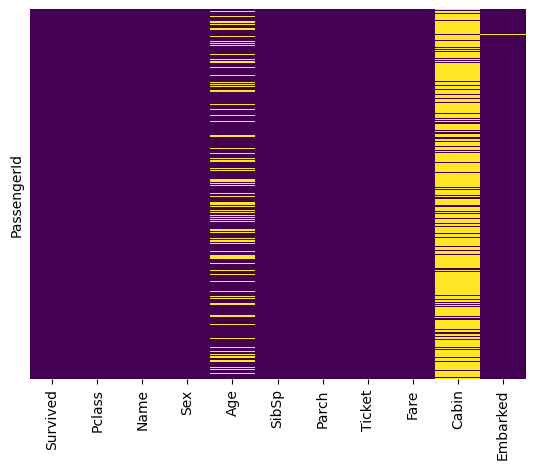

In [10]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
# yticklabels value decides whether the y-labels will be displayed or not

This heat map is made from the "train.isnull()" table whose cells has two values either 'True' or 'False' (can be seen in the cells above). Hence the heatmap shows the amount of False values in Yellow and True in purple.

<Axes: ylabel='PassengerId'>

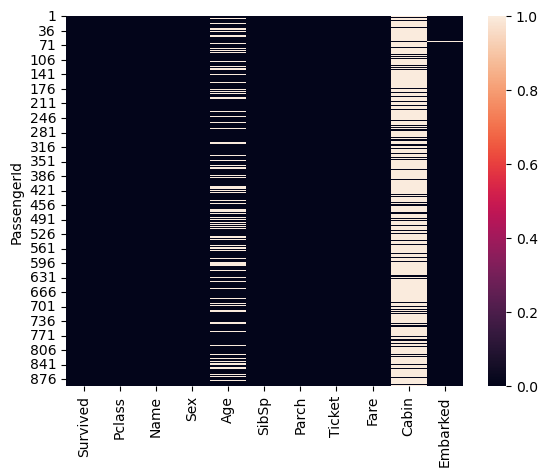

In [12]:
sns.heatmap(train.isnull())

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation.

Looking at the cabin column, it seems we are just missing too much of that data to do something useful at a basic level. We will either drop this column later or change it to another feature like "Cabin Known: 1 or 0".

In [14]:
sns.set_style('whitegrid')
# makes lines in the background of graphs

<Axes: xlabel='Survived', ylabel='count'>

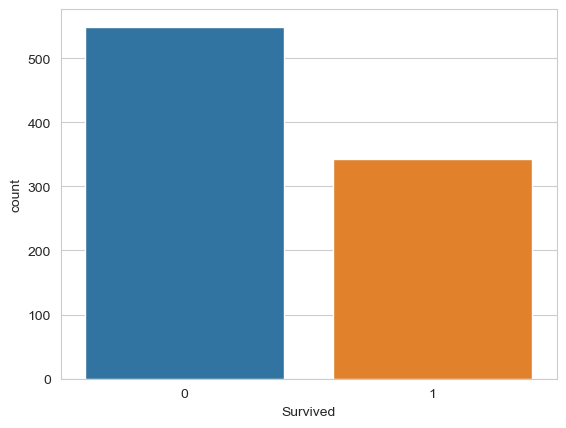

In [15]:
sns.countplot(x='Survived',data=train)

<Axes: xlabel='Survived', ylabel='count'>

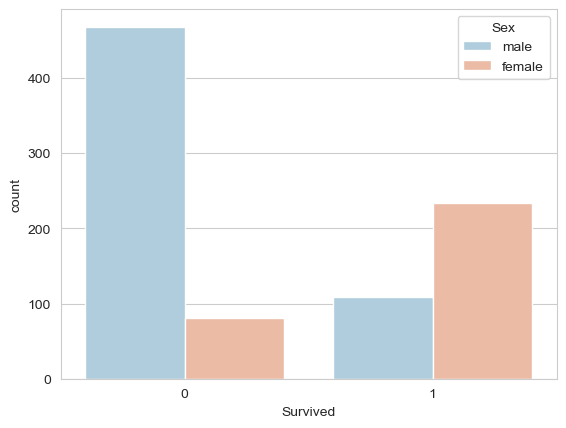

In [16]:
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

AttributeError: 'numpy.int64' object has no attribute 'startswith'

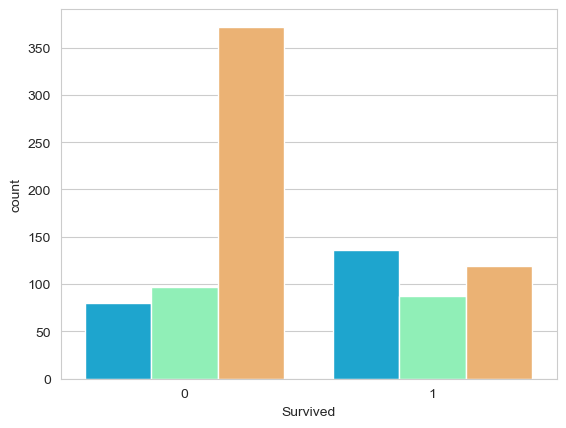

In [17]:
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

In [ ]:
sns.displot(train['Age'].dropna(),kde=False,color='darkred',bins=40)
# kde = True draws the probability distribution curve over the histogram

Most of the population was in the age range of 20-30

In [ ]:
train['Age'].hist(bins=30,color='darkred',alpha=0.3)

In [ ]:
sns.displot(train['Age'].dropna(),kde=True,color='darkred',bins=40)
# .dropna() -> to drop the null values

The above plot shows the count of people of each age group on y-axis and the age groups on x-axis.

Clearly, the majority of the population was aged between 20-30 years

Parameters:
- data = train['Age'].dropna() -> to drop the null values in the 'Age' column.
- kde = True -> shows the density distribution curve on top of the histogram
- color -> for color
- bins -> for the number of bars, by default it is zero hence we get a smooth histogram



In [ ]:
sns.countplot(x='SibSp',data=train)

Most of the people on the ship had no siblings or spouse.

In [ ]:
sns.countplot(x='SibSp',data=train,hue='Pclass')

In [ ]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

#### Cufflinks 

In [ ]:
# import cufflinks as cf
# cf.go_offline()

In [ ]:
# train['Fare'].iplot(kind='hist',bins=30,color='green')

#### Data Cleaning:
We want to fill in missing age data instead of just dropping the missing data rows. One way to do this is by filling in the mean age of all the passengers (imputation). However, we can be smarter about this and check the average age by passenger class. For Example:

In [ ]:
plt.figure(figsize=(12,7))

In [ ]:
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

It can be observed that wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute values based on Pclass for Age.

In [ ]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [ ]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

All the NULLs are removed from the Age column.

Now, we will drop the Cabin column and the row in Embarked column that in NaN.

In [ ]:
train.drop('Cabin',axis=1,inplace=True)

In [ ]:
train.head()

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Now our data is IMMACULATE.

In [ ]:
train.dropna(inplace=True)

#### Converting Categorical Features
We'll need to convert features to dummy variables using pandas. Otherwise, our machine learning algorithms won't be able to take in those features as input directly.

In [ ]:
train.info()

In [ ]:
pd.get_dummies(train['Embarked'], drop_first=True).head()

In [ ]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [ ]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [ ]:
train.head()

In [ ]:
train = pd.concat([train,sex,embark],axis=1)

In [ ]:
train.head()

Now the data is ready for our model! 

### Building a Logistic Regression Model
1. Splitting our data into a training set and test set

In [ ]:
train.drop('Survived',axis=1).head()

In [ ]:
train['Survived'].head()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(train.drop('Survived', axis=1), train['Survived'], test_size = 0.30, random_state=101)

### Training and Prediction

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train,Y_train)

In [ ]:
predictions = logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
accuracy=confusion_matrix(Y_test, predictions)

In [ ]:
accuracy

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy=accuracy_score(Y_test, predictions)
print(accuracy)

In [ ]:
predictions 

### Evalution

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(Y_test, predictions))